# Bazario Delivery orders forecasting
Objective: After going through the key insights, the company decides to manage its supply chain more efficiently to reduce the delivery cost and delivery time. To do this the company have asked to forcast the number of orders for year 2024 and 2025.
 we will perform time series analysis to forcast the no. of order for next year. we will use SARIMAX  model for forcasting

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [502]:
df= pd.read_csv('Orders_Delivered_2016-2023.csv')

In [504]:
df.tail()

,Month,Orders Delivered
91,8/1/2023,216638
92,9/1/2023,219903
93,10/1/2023,215725
94,11/1/2023,222529
95,12/1/2023,326545


In [506]:
df.head()

,Month,Orders Delivered
0,1/1/2016,146171
1,2/1/2016,152064
2,3/1/2016,154646
3,4/1/2016,150032
4,5/1/2016,154678


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             96 non-null     object
 1   Orders Delivered  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [512]:
df.describe()

,Orders Delivered
count,96.000000
mean,192750.489583
std,34728.395821
min,146171.000000
25%,168830.500000
50%,190617.000000
75%,209798.500000
max,326545.000000


In [514]:
df.columns=['Month','Orders']

In [516]:
df.head()

,Month,Orders
0,1/1/2016,146171
1,2/1/2016,152064
2,3/1/2016,154646
3,4/1/2016,150032
4,5/1/2016,154678


In [518]:
# convert month into datatime
df['Month'] = pd.to_datetime(df['Month'])

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   96 non-null     datetime64[ns]
 1   Orders  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [522]:
df.head()

,Month,Orders
0,2016-01-01,146171
1,2016-02-01,152064
2,2016-03-01,154646
3,2016-04-01,150032
4,2016-05-01,154678


In [524]:
# set Month column as index
df.set_index('Month',inplace= True)

In [526]:
df.head()

,Orders
Month,
2016-01-01,146171
2016-02-01,152064
2016-03-01,154646
2016-04-01,150032
2016-05-01,154678


## Visualize data

<Axes: xlabel='Month'>

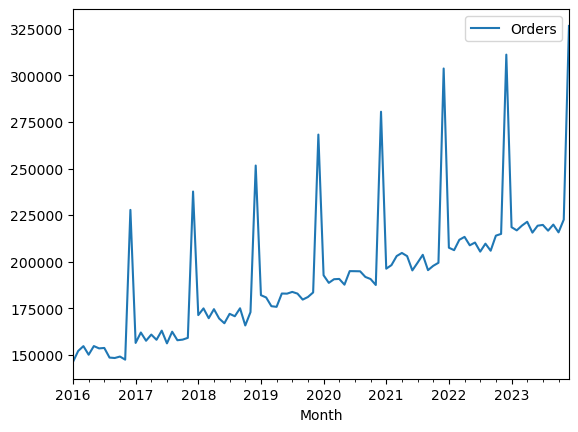

In [528]:
df.plot()

In [530]:
## Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [532]:
test_result = adfuller(df['Orders'])

In [534]:
# h0= data is not stationery
# h1 = data is stationery

def adfuller_test(Orders):
    result= adfuller(Orders)
    labels=['ADF Test Statistic','p value', '#lags used', 'number of observations used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1] <= 0.05:
            print(' data has strong evidence against null hypothesis. data has not unit root and is stationery')
        else:
            print('weak evidence againt null hypothesis, time series has a unit root, indicating it is not stationery')

In [536]:
adfuller_test(df['Orders'])

ADF Test Statistic : -0.45038411643447246
weak evidence againt null hypothesis, time series has a unit root, indicating it is not stationery
p value : 0.9013404959271079
weak evidence againt null hypothesis, time series has a unit root, indicating it is not stationery
#lags used : 11
weak evidence againt null hypothesis, time series has a unit root, indicating it is not stationery
number of observations used : 84
weak evidence againt null hypothesis, time series has a unit root, indicating it is not stationery


### If data is not Stationary we need to do **differncing**
it is the process of shifting down the values by rows. which creates NaN values which is equal to shift number and then there is difference between bith values under new column Seasonal First Difference. in seasonal data we do shift by 12. make sure to drop NaN values before executing


df_new['Seasonal First Difference']=df['Sales']-df['Orders'].shift(12)

adfuller_test(df_new['Seasonal First Difference']).dropna()

In [538]:
df['Seasonal First Difference']=df['Orders']-df['Orders'].shift(12)

In [540]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -9.168053077700492
 data has strong evidence against null hypothesis. data has not unit root and is stationery
p value : 2.430319256366805e-15
 data has strong evidence against null hypothesis. data has not unit root and is stationery
#lags used : 0
 data has strong evidence against null hypothesis. data has not unit root and is stationery
number of observations used : 83
 data has strong evidence against null hypothesis. data has not unit root and is stationery


<Axes: xlabel='Month'>

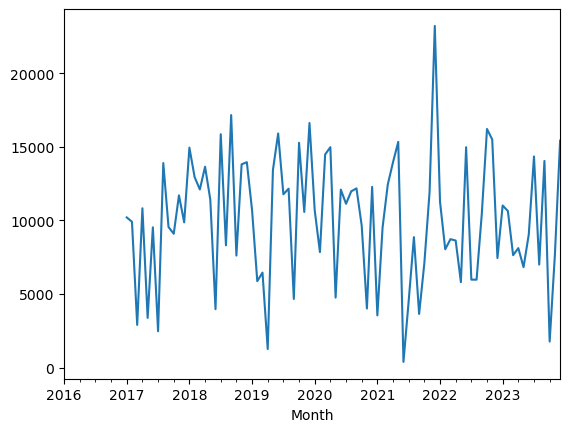

In [542]:
df['Seasonal First Difference'].plot()

### Auto Regressive model

An AR model predicts a variable's future value based on its past values. It's used for time series forecasting, signal processing, and more. The formula is:

```
Yt = c + φ₁Yt-₁ + φ₂Yt-₂ + ... + φpYt-p + εt
```

where:

- `Yt`: Current value
- `c`: Constant
- `φ`: Coefficients
- `Yt-i`: Past values
- `εt`: Error term

The order `p` determines the number of past values used. Stationarity is a key assumption for AR models.


#### Final Thoughts on Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF "shuts off past the order of the model. The phrase "shuts off" means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the "order of the model we mean the most extreme lag of x that is used as a predictor.

Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d, q

p= AR Model lags, 
d= differencing, 
q= Moving Average lags

In [544]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

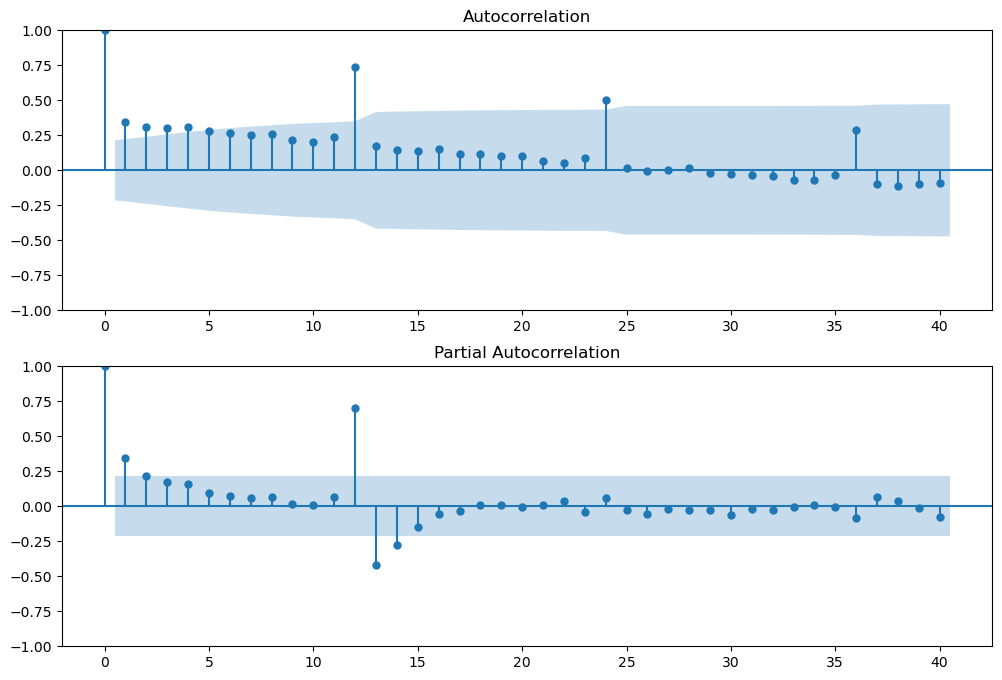

In [546]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Orders'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Orders'].iloc[13:],lags=40,ax=ax2)

In [1164]:
model=sm.tsa.statespace.SARIMAX(df['Orders'], order=(2,2,2), seasonal_order=(2,2,2,12))
results=model.fit()

C:\Users\Abhi\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abhi\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Abhi\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Abhi\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Abhi\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood op

<Axes: xlabel='Month'>

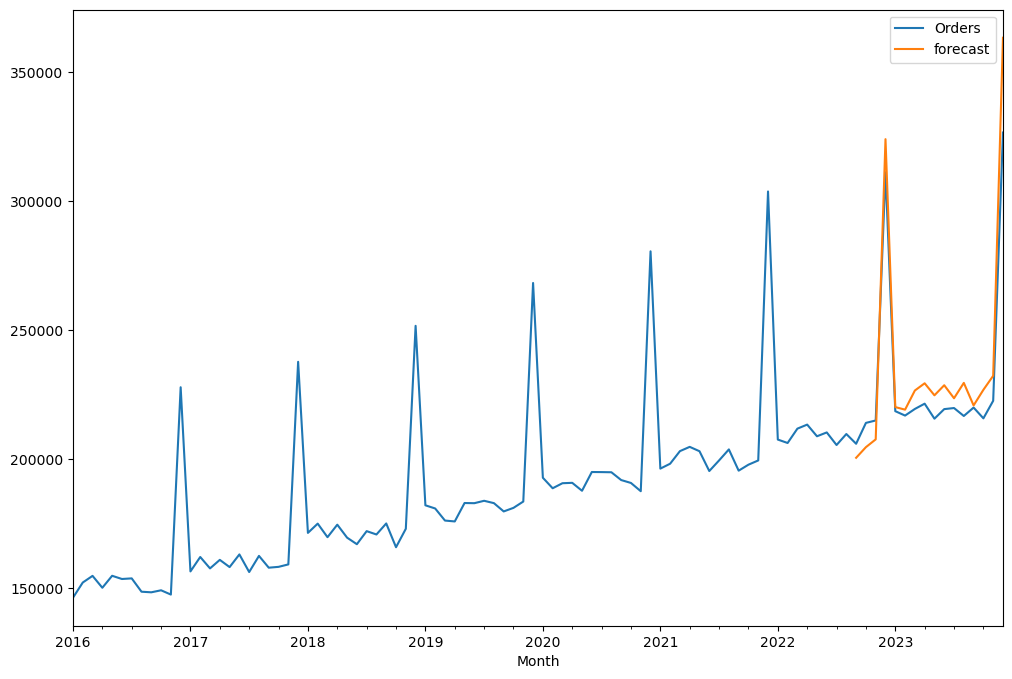

In [1165]:
df['forecast']=results.predict(start=80, end=97, dynamic=True)
df[['Orders', 'forecast']].plot(figsize=(12,8))

In [1166]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [1167]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [1168]:
future_datest_df.tail()

,Orders,Seasonal First Difference,forecast
2025-07-01,NaN,NaN,NaN
2025-08-01,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN


In [1169]:
future_df = pd.concat([df, future_datest_df])

<Axes: >

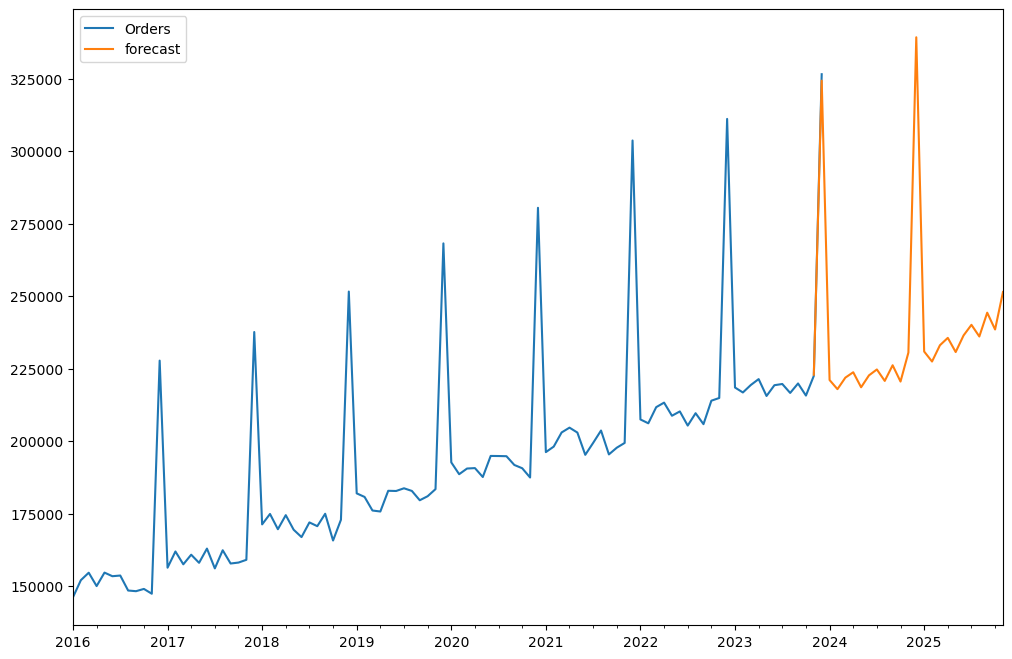

In [1170]:
future_df['forecast'] = results.predict(start=94, end=122, dynamic=True)
future_df[['Orders', 'forecast']].plot(figsize=(12, 8))

In [1171]:
future_df.tail(26)

,Orders,Seasonal First Difference,forecast
2023-10-01,215725,1765.0,NaN
2023-11-01,222529,7635.0,222920.265010
2023-12-01,326545,15415.0,324326.735005
2024-01-01,NaN,NaN,221085.750701
2024-02-01,NaN,NaN,217937.154104
2024-03-01,NaN,NaN,221908.729032
2024-04-01,NaN,NaN,223769.739161
2024-05-01,NaN,NaN,218591.000354
2024-06-01,NaN,NaN,222701.995193
2024-07-01,NaN,NaN,224728.529098


In [1172]:
future_df = future_df.drop(columns=['Seasonal First Difference'])

In [1173]:
future_df.tail(26)

,Orders,forecast
2023-10-01,215725,NaN
2023-11-01,222529,222920.265010
2023-12-01,326545,324326.735005
2024-01-01,NaN,221085.750701
2024-02-01,NaN,217937.154104
2024-03-01,NaN,221908.729032
2024-04-01,NaN,223769.739161
2024-05-01,NaN,218591.000354
2024-06-01,NaN,222701.995193
2024-07-01,NaN,224728.529098


In [1174]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop rows where either 'Orders' or 'forecast' has NaN values
df_cleaned = future_df.dropna(subset=['Orders', 'forecast'])

# Filter the data for November 2023 and December 2023 using the Date index
df_filtered = df_cleaned.loc['2023-11-01':'2023-12-01']

# Actual vs Predicted values for November and December 2023
y_actual = df_filtered['Orders']
y_predicted = df_filtered['forecast']

# Calculate accuracy metrics
mae = mean_absolute_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
rmse = mse ** 0.5
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

# Output the metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")


MAE: 1304.765002592234
MSE: 2536893.948611262
RMSE: 1592.7629919769174
MAPE: 0.43%


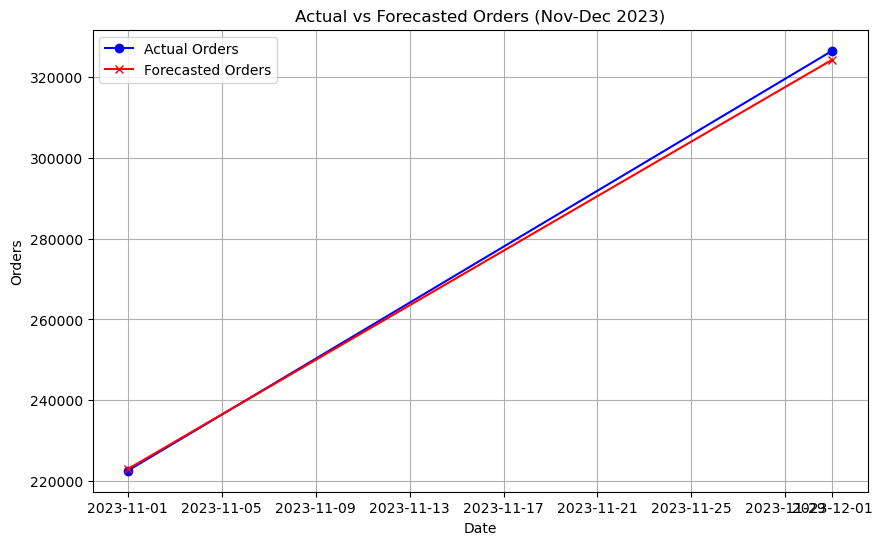

In [1175]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted (forecast) values for November and December 2023
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, y_actual, label='Actual Orders', color='blue', marker='o')
plt.plot(df_filtered.index, y_predicted, label='Forecasted Orders', color='red', marker='x')

# Adding labels and title
plt.title('Actual vs Forecasted Orders (Nov-Dec 2023)')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
